In [1]:
import pickle
from sklearn import linear_model as lm, preprocessing as p
import matplotlib.pyplot as plt
import numpy as np
import random
from prettytable import PrettyTable

In [2]:
file = open("./train_dataset.pickle", "rb")
x = pickle.load(file)
file.close()
count_train = 0

file = open("./test_dataset.pickle", "rb")
y = pickle.load(file)
file.close()
count_test = 0

l_train = []
for lines in x:
    l_train.append(lines)
    count_train += 1

l_test = []
for lines in y:
    l_test.append(lines)
    count_test += 1


In [3]:
X_train = []
Y_train = []

X_test = [l_test[x][0] for x in range(0, count_test)]
Y_test = [l_test[x][1] for x in range(0, count_test)]

visited = []
for i in range(0, count_train, 1):
    visited.append(False)

index = 0           # Arbitrarily Assigned

for i in range(0, 20, 1):
    l1 = []
    l2 = []
    for j in range(0, int(count_train/20), 1):
        while True:
            index = random.randint(0, count_train-1)
            if (visited[index] == False):
                visited[index] = True
                break
        l1.append(l_train[index][0])
        l2.append(l_train[index][1])
    # l1 = [l_train[m][0] for m in range(i*int(count_train/20), (i+1)*int(count_train/20))]
    # l2 = [l_train[m][1] for m in range(i*int(count_train/20), (i+1)*int(count_train/20))]
    l1 = np.reshape(l1, (-1, 1))
    l2 = np.reshape(l2, (-1, 1))
    X_train.append(l1)
    Y_train.append(l2)

In [4]:
mse_list = []
var_list = []
bias_list = []
irreducible_list = []

for poly_degree in range(1, 16, 1):

    predict = []
    bias = 0
    mse = 0
    variance = 0
    irred_error = 0

    for i in range(0, 20, 1):
        poly_features = p.PolynomialFeatures(degree=poly_degree, include_bias=False)
        X_poly = poly_features.fit_transform(X_train[i])
        model = lm.LinearRegression().fit(X_poly, Y_train[i])
        predict_list = []
        for j in range(0, count_test, 1):
            x_test = [[X_test[j]]]
            x_test_poly = poly_features.transform(x_test)
            y_test_pred = model.predict(x_test_poly)
            predict_list.append(y_test_pred)
        predict.append(predict_list)
    
    for i in range(0, count_test, 1):
        mean_pred = 0
        for j in range(0, 20, 1):
            mean_pred += predict[j][i]
        mean_pred /= 20

        bias_iter = abs(mean_pred-Y_test[i])
        bias += bias_iter

        initial_square = 0 
        for j in range(0, 20, 1):
            initial_square += predict[j][i]**2

        var_iter = initial_square/20-mean_pred**2
        variance += var_iter

        mse_iter = 0
        for j in range(0, 20, 1):
            mse_iter += (predict[j][i]-Y_test[i])**2
        mse_iter /= 20
        mse += mse_iter

        irred_error = irred_error + mse_iter - bias_iter**2 - var_iter

    variance /= (count_test)
    mse /= (count_test) 
    bias /= (count_test)
    irred_error /= (count_test)

    mse_list.append(mse)
    var_list.append(variance)
    bias_list.append(bias)
    irreducible_list.append(irred_error)

In [5]:
table = PrettyTable(['Degree of Polynomial', 'Bias', 'Variance', 'Mean Squared Error', 'Irreducible Error'])
for i in range(0, 15, 1):
    table.add_row([i+1, bias_list[i][0][0], var_list[i][0][0], mse_list[i][0][0], irreducible_list[i][0][0]])
print(table)

+----------------------+----------------------+-----------------------+----------------------+-------------------------+
| Degree of Polynomial |         Bias         |        Variance       |  Mean Squared Error  |    Irreducible Error    |
+----------------------+----------------------+-----------------------+----------------------+-------------------------+
|          1           | 0.26871836729048143  |  0.008497813770900723 |  0.1232071917341779  |  -6.886852199627925e-17 |
|          2           | 0.08605576887140859  | 0.0012093414814370307 | 0.013400382579330157 |  5.778363898478745e-17  |
|          3           | 0.033371663718274325 | 0.0003368845057376074 | 0.00504092852545256  | -1.9232486154867334e-16 |
|          4           | 0.025076454411252443 | 0.0004251158604658545 | 0.004681399713658434 |  3.6301799240245904e-18 |
|          5           | 0.025236787898970884 | 0.0004877320093486093 | 0.00473197796425213  |  1.507661725498599e-16  |
|          6           | 0.02458

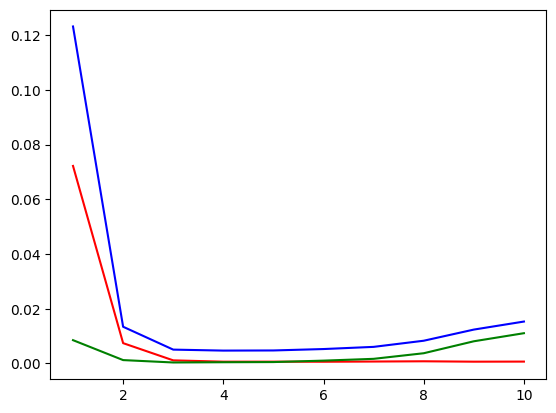

In [6]:
degree = [i for i in range(1, 11, 1)]
bias_plot = [bias_list[i][0][0]**2 for i in range(0, 10, 1)]
var_plot = [var_list[i][0][0] for i in range(0, 10, 1)]
mse_plot = [mse_list[i][0][0] for i in range(0, 10, 1)]
# irreducible_plot = [irreducible_list[i][0][0] for i in range(0, 15, 1)]
plt.plot(degree, bias_plot, label = "Bias", color = "r",linestyle="-")
plt.plot(degree, var_plot, label = "Variance", color = "g", linestyle="-")
plt.plot(degree, mse_plot, label = "Mean Squared Error", color = "b", linestyle="-")
# plt.plot(degree, irreducible_plot, label = "Irreducible Error", color = "y", linestyle="-")
# plt.yscale('log')
plt.show()